In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


#### Use seaborn's load_dataset function to load the iris database to answer the following questions:

#### 1. What does the distribution of petal lengths look like?

In [117]:
iris = sns.load_dataset('iris')

In [118]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


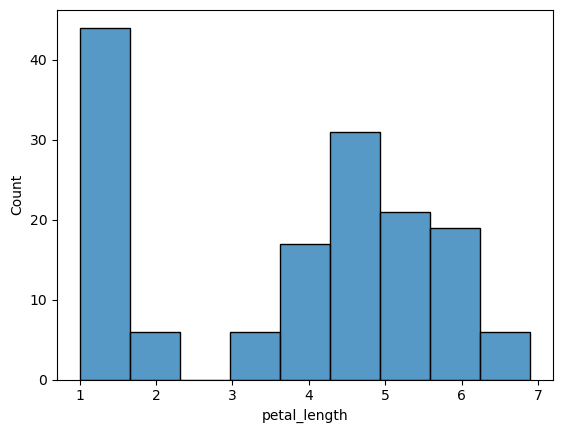

In [119]:
sns.histplot(iris.petal_length)
plt.show()

#### 2. Is there a relationship between petal length and petal width?

In [20]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


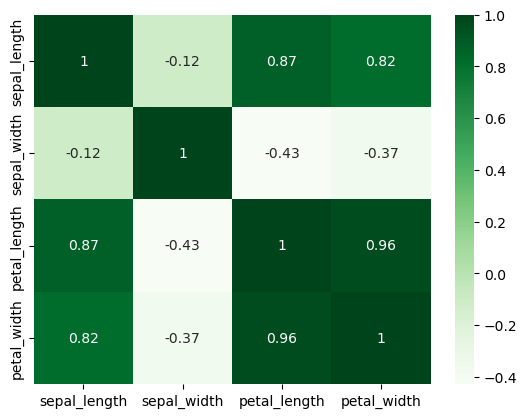

In [22]:
sns.heatmap(iris.corr(), cmap='Greens', annot=True)
plt.show()

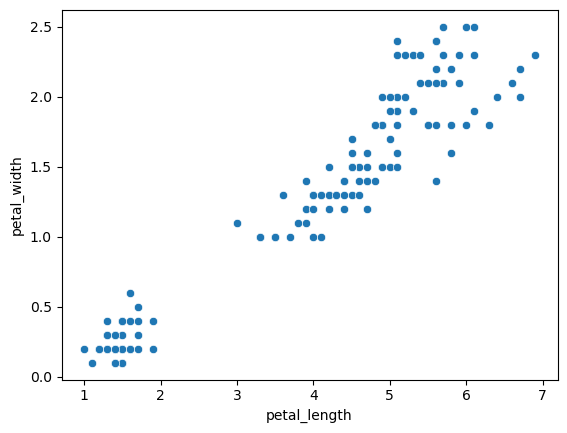

In [120]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width')
plt.show()

#### 3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

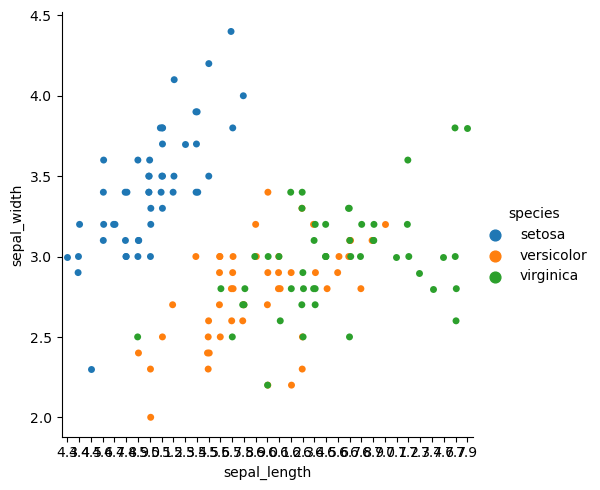

In [30]:
sns.catplot(data=iris, x='sepal_length', y='sepal_width', hue='species')
plt.show()

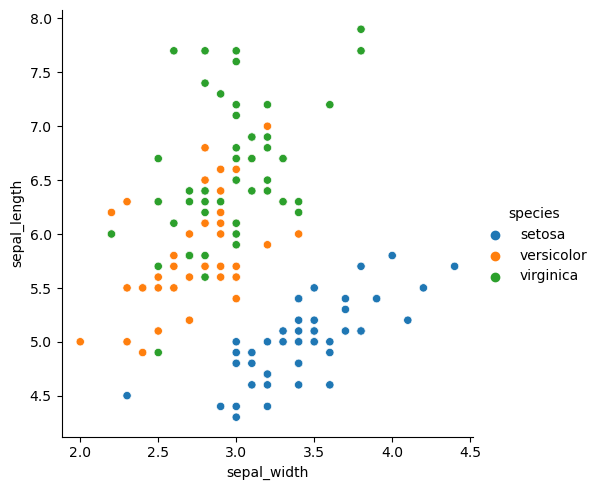

In [121]:
sns.relplot(data=iris, x='sepal_width', y='sepal_length', hue='species')
plt.show()

#### 4. Which features would be best used to predict species?

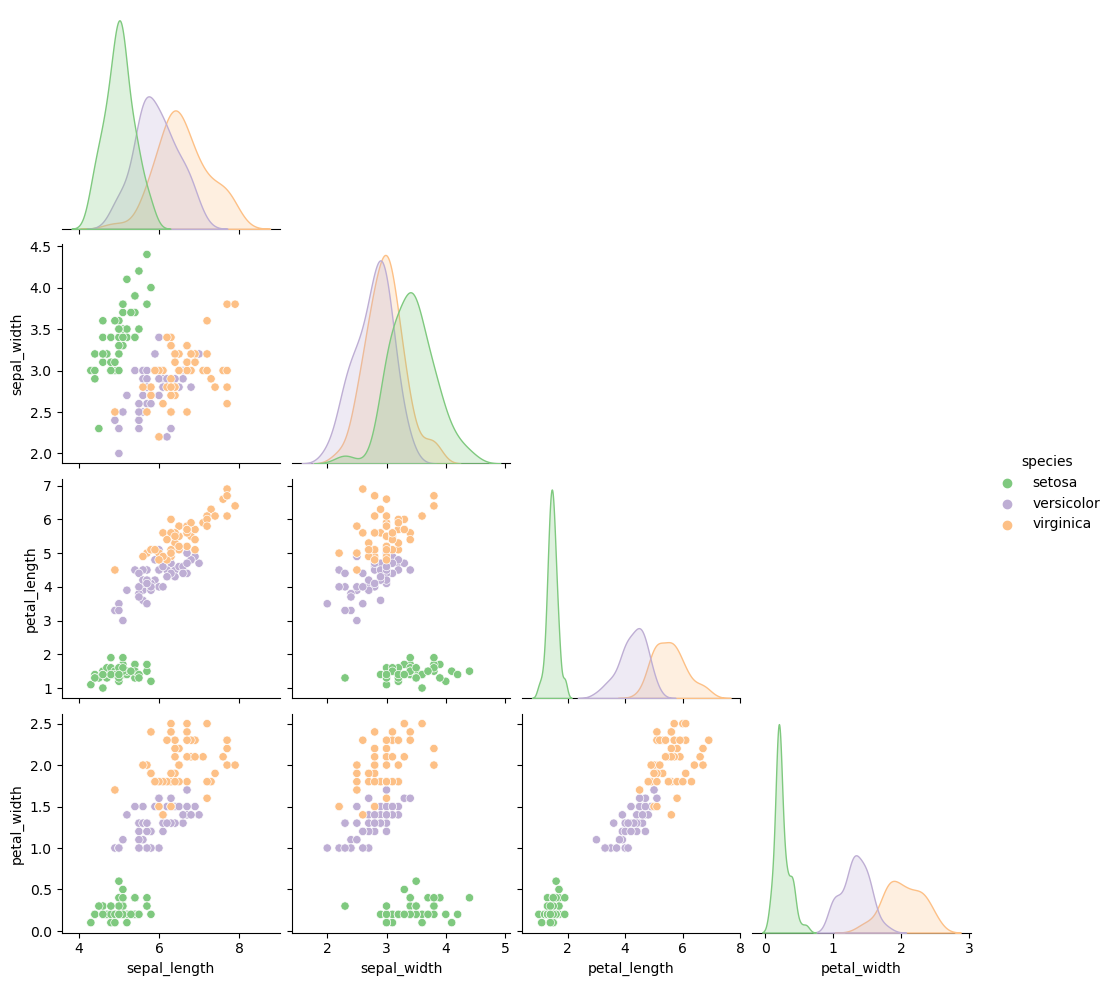

In [31]:
sns.pairplot(data=iris, hue='species', corner=True, palette='Accent')
plt.show()

In [ ]:
#petal_length and petal_width

#### 1. Load the anscombe dataset from seaborn. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

In [122]:
anscombe = sns.load_dataset('anscombe')

In [123]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

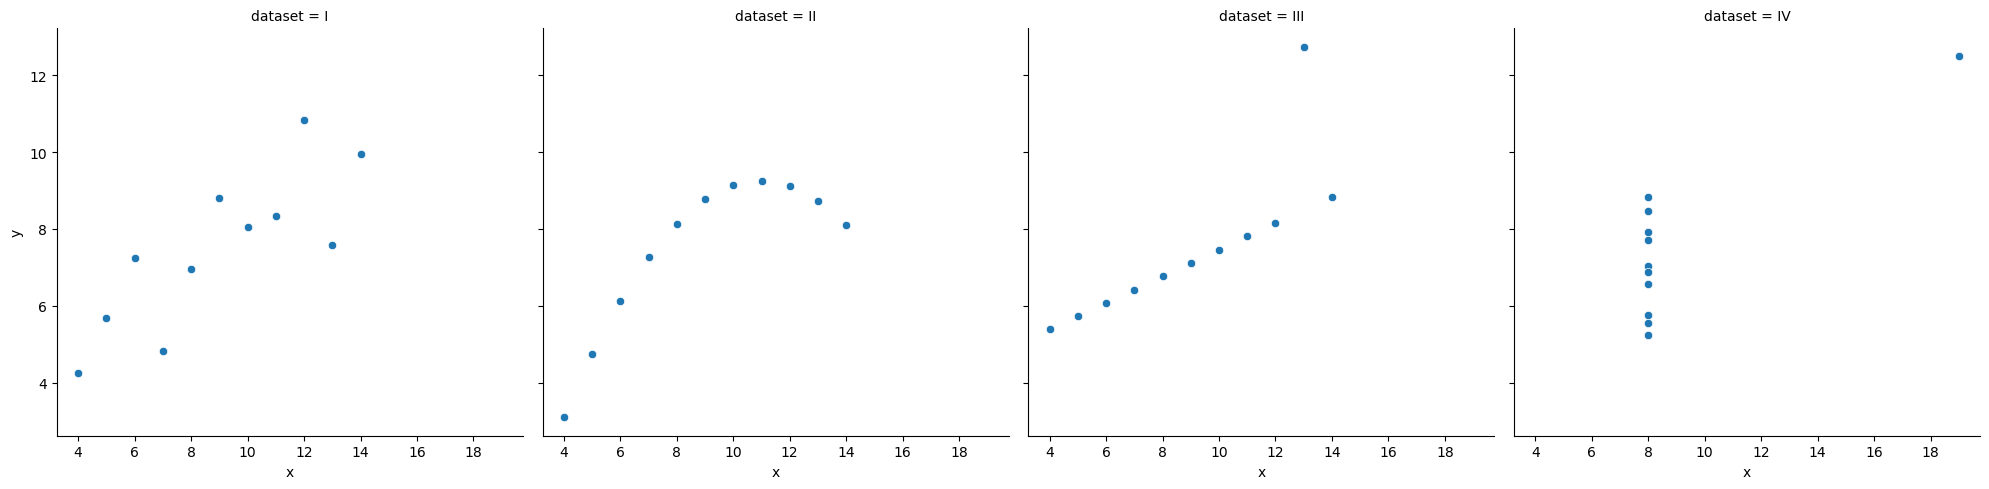

In [125]:
sns.relplot(x='x', y='y', data=anscombe, col='dataset')
plt.show()

#### 2. Load the InsectSprays dataset from pydataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [2]:
from pydataset import data
insect_sprays = data('InsectSprays')

In [127]:
# data('InsectSprays', show_doc=True)

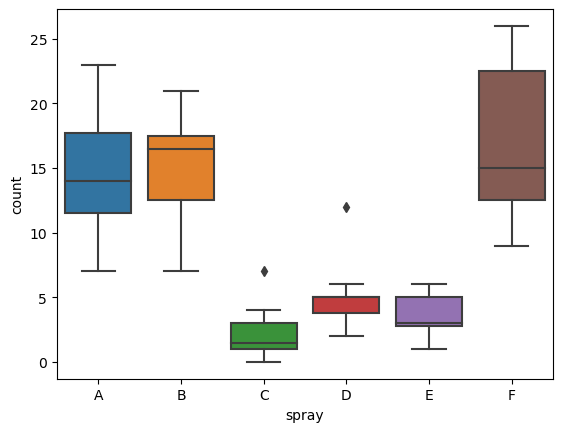

In [129]:
sns.boxplot(data=insect_sprays, x='spray', y='count')
plt.show()

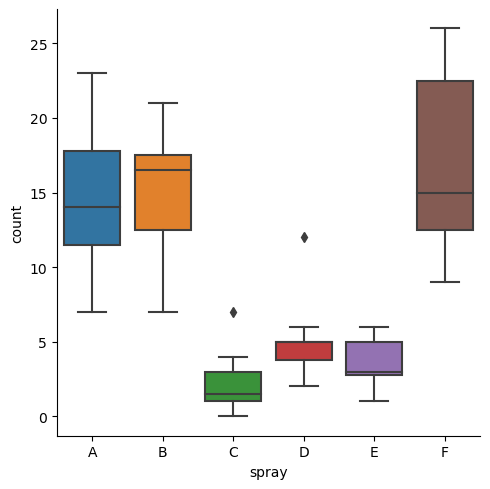

In [55]:
sns.catplot(data=insect_sprays, y='count', x='spray', kind='box')
plt.show()

#### 3. Load the swiss dataset from pydataset and read it's documentation. Create visualizations to answer the following questions:

In [3]:
swiss = data('swiss')

In [4]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [130]:
# data('swiss', show_doc=True)

#### Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [13]:
swiss['is_catholic'] = swiss['Catholic'] > 50
swiss.sample(5)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Rive Gauche,42.8,27.7,22,29,58.33,19.3,True
Paysd'enhaut,72.0,63.5,6,3,2.56,18.0,False
Conthey,75.5,85.9,3,2,99.71,15.1,True
Broye,83.8,70.2,16,7,92.85,23.6,True
Delemont,83.1,45.1,6,9,84.84,22.2,True


#### Does whether or not a province is Catholic influence fertility?

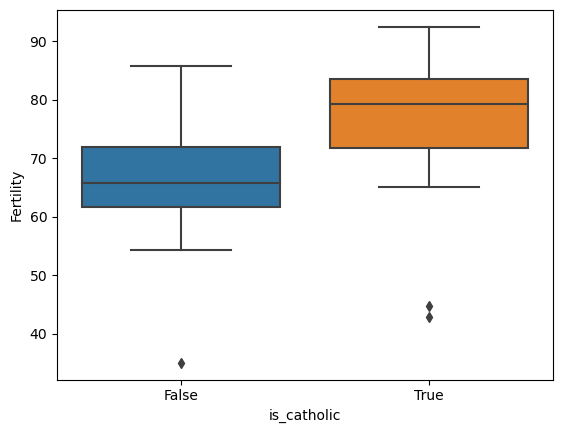

In [131]:
sns.boxplot(data=swiss, x='is_catholic', y='Fertility')
plt.show()

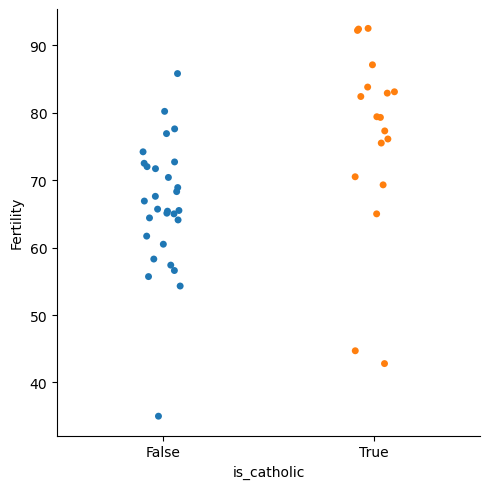

In [16]:
sns.catplot(data=swiss, x='is_catholic', y='Fertility', hue='is_catholic')
plt.show()

In [17]:
swiss.corr()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556,0.402813
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859,0.410503
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022,-0.597861
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322,-0.154677
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496,0.961723
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000,0.166081
is_catholic,0.402813,0.410503,-0.597861,-0.154677,0.961723,0.166081,1.000000


#### What measure correlates most strongly with fertility?

In [ ]:
# education column

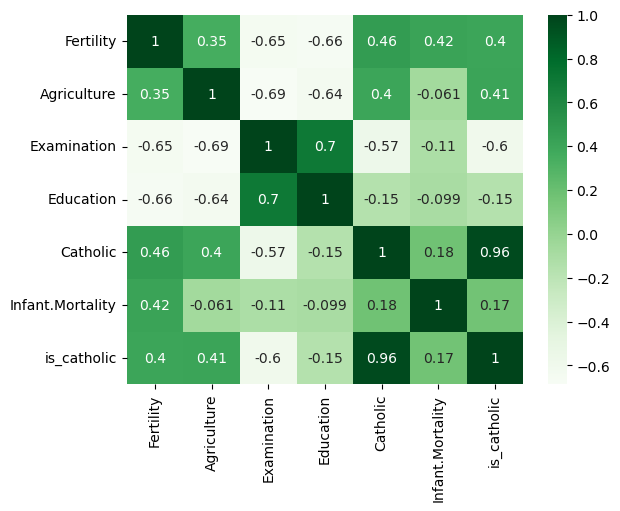

In [132]:
sns.heatmap(swiss.corr(), annot=True, cmap='Greens')
plt.show()

Fertility


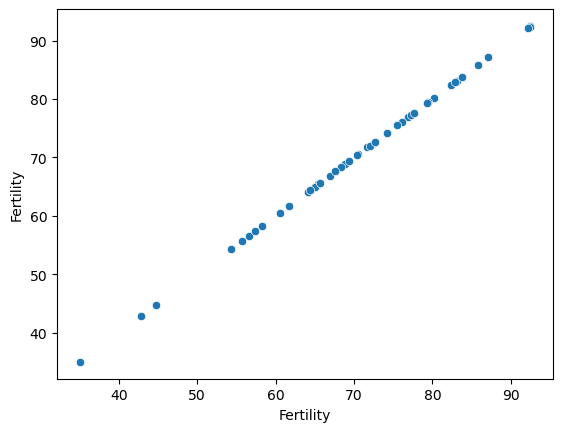

Agriculture


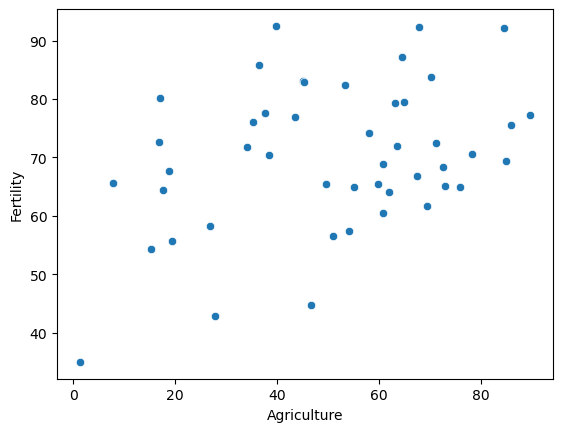

Examination


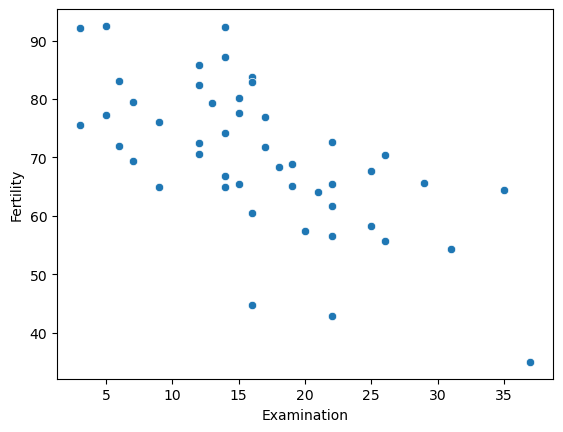

Education


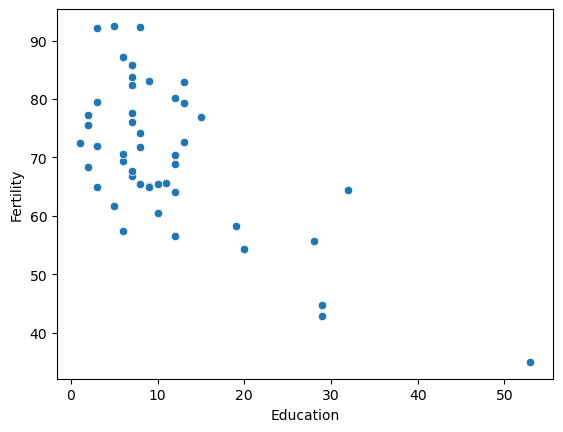

Catholic


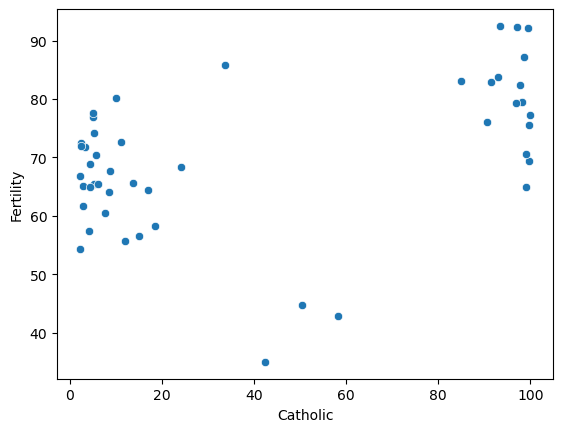

Infant.Mortality


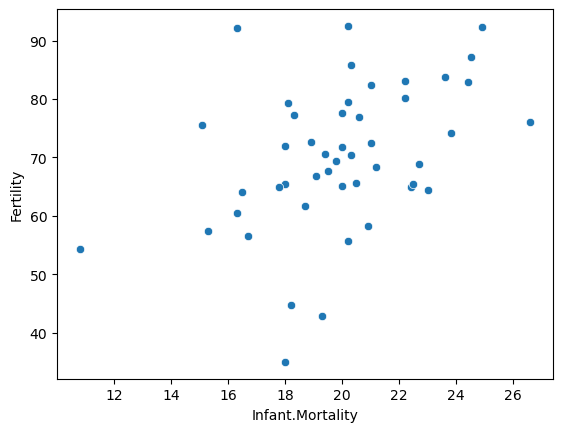

is_catholic


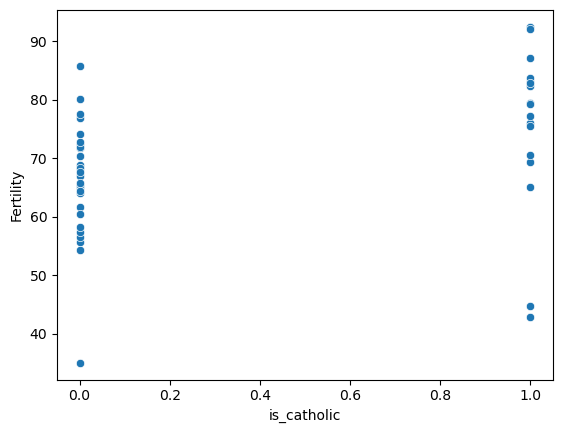

In [134]:
for col in swiss:
    print(col)
    sns.scatterplot(data=swiss, y='Fertility', x=col)
    plt.show()

#### 4. Load the chipotle dataset from SQL, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [19]:
from env import username, password, get_db_url

In [20]:
url = get_db_url('chipotle')

In [22]:
pd.read_sql('select * from orders limit 5', url)

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [23]:
orders = pd.read_sql('select * from orders', url)

In [59]:
orders['item_price'] = orders.item_price.str.replace('$','', regex=True).astype(float)

In [83]:
orders.groupby(['item_name']).sum().sort_values(by='item_price', ascending=False).head()

,id,order_id,quantity,item_price
item_name,,,,
Chicken Bowl,1780635,713926,761,7342.73
Chicken Burrito,1238770,497303,591,5575.82
Steak Burrito,818163,328437,386,3851.43
Steak Bowl,482932,193752,221,2260.19
Chips and Guacamole,1122252,449959,506,2201.04


In [102]:
orders.groupby(['item_name']).sum().sort_values(by='quantity', ascending=False).head()

,id,order_id,quantity,item_price
item_name,,,,
Chicken Bowl,1780635,713926,761,7342.73
Chicken Burrito,1238770,497303,591,5575.82
Chips and Guacamole,1122252,449959,506,2201.04
Steak Burrito,818163,328437,386,3851.43
Canned Soft Drink,760291,304753,351,438.75


In [111]:
most_popular = orders.groupby(['item_name']).sum().sort_values(by='quantity', ascending=False).quantity.head(4)
most_popular

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [112]:
most_popular_rev = orders.groupby(['item_name']).sum().sort_values(by='quantity', ascending=False).item_price.head(4)
most_popular_rev

item_name
Chicken Bowl           7342.73
Chicken Burrito        5575.82
Chips and Guacamole    2201.04
Steak Burrito          3851.43
Name: item_price, dtype: float64

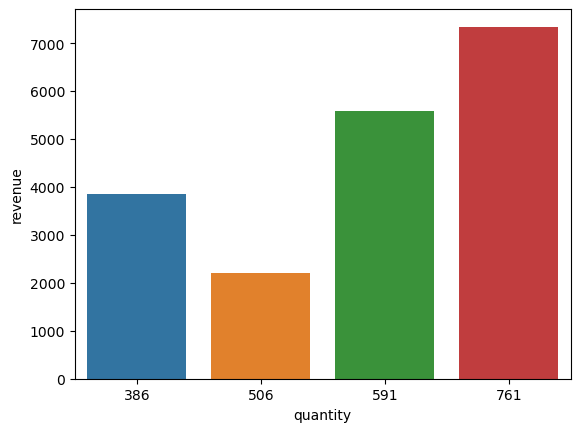

In [137]:
sns.barplot(x=most_popular, y=most_popular_rev)
plt.ylabel('revenue')

plt.show()

#### 5. Load the sleepstudy dataset from pydataset and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [114]:
from pydataset import data
sleepstudy = data('sleepstudy')

In [116]:
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [140]:
sleepstudy.Subject = sleepstudy.Subject.astype(str)

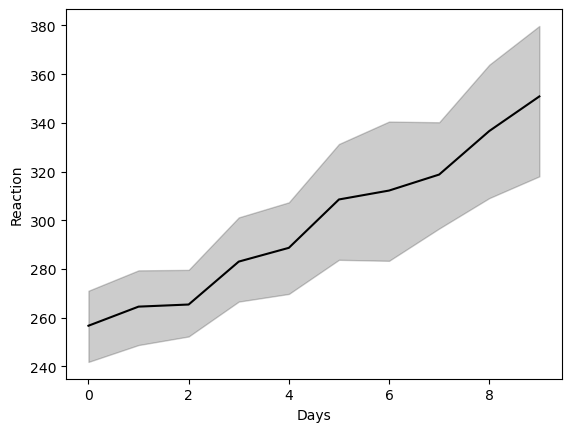

In [142]:
sns.lineplot(data=sleepstudy, x='Days', y='Reaction', color='black')
plt.show()